In [0]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import random
%matplotlib inline

In [2]:
!git clone http://github.com/rodolfojbrandao/PHD
%cd PHD

Cloning into 'PHD'...
remote: Enumerating objects: 45, done.
remote: Counting objects: 100% (45/45), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 4292 (delta 16), reused 38 (delta 12), pack-reused 4247
Receiving objects: 100% (4292/4292), 53.85 MiB | 20.60 MiB/s, done.
Resolving deltas: 100% (371/371), done.
Checking out files: 100% (4055/4055), done.
/content/PHD


In [0]:
# funcao normatiza dados
def Normatiza(x):
    strings=list(x)
    for i in strings:
        max_x=x[i].max()
        min_x=x[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=(x[i]-a)/b
    return x

In [0]:
def Original(x,x_old):
    strings=list(x)
    for i in strings:
        max_x=x_old[i].max()
        min_x=x_old[i].min()
        a=(max_x+min_x)/2
        b=(max_x-min_x)/2
        x[i]=x[i]*b+a
    return x

In [0]:
def rede(i,j):
    clf = MLPRegressor(solver='lbfgs',activation='relu',alpha=1e-5, hidden_layer_sizes=(i),random_state=j)
    return clf

In [0]:
Melhor=1e99
N=20 #i numero de neuronios
M=10 #j
O=15 #k

In [7]:
for k in range(0,O):
  # leitura dos dados
  DAT=pd.read_csv("difusividade.csv")

  # separa as colunas de interesse
  Index=[0,1,2,3,4,5,6,7,8]
  Dat_Select=[]
  Dat_Select=DAT.iloc[:,Index].copy()

  # separa os dados em normatizados e originais
  DAT_OLD=[]
  DAT_OLD=Dat_Select.copy()
  DAT=Normatiza(Dat_Select)
  
  # separa os dados em treino e teste
  train=[]
  test=[]
  train=DAT.sample(frac=0.8,random_state=k).copy()
  test=DAT.drop(train.index).copy()
  
  # obtem as variaveis independentes (treino e teste)
  x_train=train.iloc[:,[0,1,2,3,4,5,6]]
  x_test=test.iloc[:,[0,1,2,3,4,5,6]]
  X_OLD=DAT_OLD.iloc[:,[0,1,2,3,4,5,6]]

  # obtem as variaveis dependentes (treino e teste)
  Index=[8]
  y_train=train.iloc[:,Index]
  y_test=test.iloc[:,Index]
  Y_OLD=DAT_OLD.iloc[:,Index]
  test=Original(y_test,Y_OLD)
  resist_obs_test=[]
  resist_obs_train=[]
  resist_obs_test=test['Difusividade_axial'].copy()
  for i in range(1,N):
      for j in range(0,M):
          col_names=list(y_train)
          clf=rede(i,j)
          clf.fit(x_train, y_train)
          y_calc_train=[]
          y_calc_test=[]
          y_calc_train=clf.predict(x_train)
          y_calc_test=clf.predict(x_test)
          y_calc_train=pd.DataFrame(y_calc_train)
          y_calc_test=pd.DataFrame(y_calc_test)
          y_calc_train.columns = col_names
          y_calc_test.columns = col_names
          y_calc_train=Original(y_calc_train,Y_OLD)
          y_calc_test=Original(y_calc_test,Y_OLD)
          resist_calc_train=[]
          resist_calc_test=[]
          resist_calc_train=y_calc_train['Difusividade_axial'].copy()
          resist_calc_test=y_calc_test['Difusividade_axial'].copy()
          mse=mean_squared_error(resist_obs_test,resist_calc_test)
          R2_teste=r2_score(resist_obs_test,resist_calc_test)
          #print("Neuronios=",i,"Seed=",j,"MSE teste=",mse,"R^2 teste=",R2_teste)
          if(mse<Melhor):
              Melhor=mse.copy()
              ix=i
              jx=j
              R2r=R2_teste
              seed_sample = k
              resist_obs_train_top=Original(y_train,Y_OLD)
              resist_calc_train_top = resist_calc_train.copy()
              resist_obs_test_top = resist_obs_test.copy()
              resist_calc_test_top = resist_calc_test.copy()

mse=mean_squared_error(resist_obs_train_top,resist_calc_train_top)
R2=r2_score(resist_obs_train_top,resist_calc_train_top)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:1316: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python3.6/dist-packages/skl

In [8]:
print("\n Melhor resposta:")
print("Neuronios=",ix,"Seed=",jx,"Seed_sample",seed_sample,"MSE teste=",Melhor,"R^2 teste=",R2r,"MSE treino=",mse,"R^2 treino=",R2)


 Melhor resposta:
Neuronios= 12 Seed= 1 Seed_sample 10 MSE teste= 3.0703284934904794e-10 R^2 teste= 0.8404566035957328 MSE treino= 5.8797001181960684e-12 R^2 treino= 0.9990774882436072


In [0]:
resist_obs_train_top=pd.DataFrame(resist_obs_train_top)
resist_calc_train_top=pd.DataFrame(resist_calc_train_top)
resist_obs_test_top=pd.DataFrame(resist_obs_test_top)
resist_calc_test_top=pd.DataFrame(resist_calc_test_top)

In [10]:
print(resist_obs_train_top.head())
print(resist_calc_train_top.head())
print('====================================')
print(resist_obs_test_top.head())
print(resist_calc_test_top.head())

    Difusividade_axial
41            0.000014
46            0.000305
26            0.000107
32            0.000067
35            0.000089
   Difusividade_axial
0            0.000013
1            0.000305
2            0.000109
3            0.000067
4            0.000090
    Difusividade_axial
0             0.000057
8             0.000037
9             0.000009
11            0.000069
15            0.000087
   Difusividade_axial
0            0.000046
1            0.000012
2           -0.000003
3            0.000076
4            0.000084


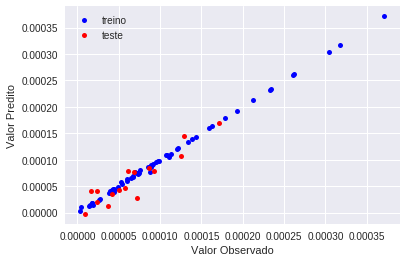

In [11]:
plt.plot(resist_obs_train_top, resist_calc_train_top,  color='green', linestyle='dashed', linewidth = 0, marker='o', markerfacecolor='blue', markersize=5, label='treino') 
plt.ylabel('Superior Calc')
plt.xlabel('Superior Obs')
#plt.xticks(np.arange(0, 0.0004, 0.00005))
#plt.yticks(np.arange(0, 0.0004, 0.00005))
plt.plot(resist_obs_test_top, resist_calc_test_top,  color='green', linestyle='dashed', linewidth = 0, marker='o', markerfacecolor='red', markersize=5, label='teste') 
plt.legend(loc='upper left')
plt.ylabel('Valor Predito')
plt.xlabel('Valor Observado')
plt.legend()
#plt.xticks(np.arange(0, 0.0004, 0.00005))
#plt.yticks(np.arange(0, 0.0004, 0.00005))
plt.show()